In [11]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [12]:
from platform import python_version
python_version()

'3.7.9'

In [13]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import axes3d  

from matplotlib.colors import ListedColormap

In [14]:
guid_id_vals = [11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 25, 26, 31, 32, 33, 34, 35, 36]
guid_id_color_mapping = {
    11: "#1f77b4", 12: "#ff7f0e", 13: "#2ca02c", 14: "#d62728", 15: "#9467bd",
    20: "#8c564b", 21: "#e377c2", 22: "#7f7f7f", 23: "#bcbd22", 24: "#17becf",
    25: "#aec7e8", 26: "#ffbb78", 31: "#98df8a", 32: "#ff9896", 33: "#c5b0d5",
    34: "#c49c94", 35: "#f7b6d2", 36: "#c7c7c7"
}

colors = [guid_id_color_mapping[val] for val in guid_id_vals]

# Create a ListedColormap using the defined colors
guid_id_cmap = ListedColormap(colors)



In [15]:
data = pd.read_csv('ops3_log.csv')


data['time'] = data['loop_dt'].cumsum()

data.head()

,guid_id,loop_dt,rwy_alt,vel,surfv,mach,hdot,lat,long,range,...,nz,drag,eow,prog_pch,prog_roll,prog_yaw,flap_defl,spdbk_defl,Unnamed: 19,time
0,12,0.60,83709.400826,7818.237866,7818.237866,26.690096,-61.836020,34.224924,-179.282981,5527.277414,...,0.090657,3.975203,9.593910e+06,40.319473,-0.537873,-0.014185,0.156667,0.0,NaN,0.60
1,12,0.60,83672.518366,7817.486797,7817.486797,26.685310,-61.110794,34.241774,-179.239442,5522.880780,...,0.091149,3.988158,9.591908e+06,40.300840,-0.542030,-0.006532,0.157864,0.0,NaN,1.20
2,12,0.62,83634.864459,7816.706806,7816.706806,26.680372,-60.357968,34.259166,-179.194438,5518.338032,...,0.091753,4.006539,9.589830e+06,40.285308,-0.546633,0.001143,0.160626,0.0,NaN,1.82
3,12,0.60,83598.870393,7815.947908,7815.947908,26.675597,-59.626102,34.275977,-179.150870,5513.942253,...,0.092246,4.023801,9.587811e+06,40.280336,-0.547705,0.004748,0.163469,0.0,NaN,2.42
4,12,0.60,83563.316175,7815.184570,7815.184570,26.670826,-58.890925,34.292770,-179.107288,5509.546902,...,0.092749,4.043451,9.585783e+06,40.282141,-0.547164,0.006246,0.166540,0.0,NaN,3.02


In [16]:
def angle360(angle):
    out = angle

    while (out >= 360):
        out -= 360
    while (out < 0):
        out += 360
    return out

def angle180(angle):
    out = angle

    while (out >= 180):
        out -= 360
    while (out < -180):
        out += 360
    return out

In [17]:
import plotly.graph_objects as go
from math import log2, radians, cos, sqrt

entry_data = data[data['guid_id'] < 20]
taem_data = data[data['guid_id'] >= 20]


# Create a Scattermapbox trace with colors based on 'alt' column
trace = go.Scattergeo(
    mode='lines+markers',
    lon=entry_data['long'],
    lat=entry_data['lat'],
    line=dict(width=1, color='black'),
    marker=dict(
        size=6,
        color=entry_data['rwy_alt'],
        colorscale='Viridis',  # Choose the colorscale you prefer
        cmin=entry_data['rwy_alt'].min(),
        cmax=entry_data['rwy_alt'].max(),
        colorbar=dict(title='Altitude')
    ),
    hovertemplate='Latitude: %{lat:.4f}<br>Longitude: %{lon:.4f}<br>Altitude: %{text}<br>Az err: %{customdata}<extra></extra>',
    text=entry_data['rwy_alt'],
    customdata=entry_data['delaz']
)

long360 = entry_data['long'].apply(lambda l: angle360(l)).to_numpy()

center_lat = (entry_data['lat'].min() + entry_data['lat'].max()) / 2
center_lon = angle180((long360.min() + long360.max()) / 2)

print(center_lat, center_lon)


# Create the layout for the 3D globe view
layout = go.Layout(
    title_text='3D Globe View',
    showlegend=False,
    geo=dict(
        showland=True,
        landcolor='rgb(243, 243, 243)',
        countrycolor='rgb(204, 204, 204)',
        showcountries=True,
        showocean=True,
        lonaxis_gridcolor='rgb(102, 102, 102)',
        lataxis_gridcolor='rgb(102, 102, 102)',
        oceancolor='rgb(204, 230, 255)',
        showcoastlines=True,
        coastlinecolor='rgb(204, 204, 204)',
        showframe=True,
    
        center=dict(lat=center_lat, lon=center_lon),
        projection_scale=2, 
        projection=dict(type='orthographic', rotation=dict(lon=center_lon, lat=center_lat, roll=0)),
        
    )
)

# Create the figure and add the trace
fig = go.Figure(data=[trace], layout=layout)

fig.update_layout(
    autosize=False,
    width=800,
    height=800,)



# Create a Scattermapbox trace with colors based on 'alt' column
trace = go.Scattergeo(
    mode='lines+markers',
    lon=taem_data['long'],
    lat=taem_data['lat'],
    line=dict(width=1, color='black'),
    marker=dict(
        size=6,
        color=taem_data['rwy_alt'],
        colorscale='Viridis',  # Choose the colorscale you prefer
        cmin=taem_data['rwy_alt'].min(),
        cmax=taem_data['rwy_alt'].max(),
        colorbar=dict(title='Altitude')
    ),
    hovertemplate='Latitude: %{lat:.4f}<br>Longitude: %{lon:.4f}<br>Altitude: %{text}<br>Az err: %{customdata}<extra></extra>',
    text=taem_data['rwy_alt'],
    customdata=taem_data['delaz']
)

long360 = taem_data['long'].apply(lambda l: angle360(l)).to_numpy()

center_lat = (taem_data['lat'].min() + taem_data['lat'].max()) / 2
center_lon = angle180((long360.min() + long360.max()) / 2)

print(center_lat, center_lon)


# Create the layout for the 3D globe view
layout = go.Layout(
    title_text='3D Globe View',
    showlegend=False,
    geo=dict(
        showland=True,
        landcolor='rgb(243, 243, 243)',
        countrycolor='rgb(204, 204, 204)',
        showcountries=True,
        showocean=True,
        lonaxis_gridcolor='rgb(102, 102, 102)',
        lataxis_gridcolor='rgb(102, 102, 102)',
        oceancolor='rgb(204, 230, 255)',
        showcoastlines=True,
        coastlinecolor='rgb(204, 204, 204)',
        showframe=True,
    
        center=dict(lat=center_lat, lon=center_lon),
        projection_scale=70, 
        projection=dict(type='orthographic', rotation=dict(lon=center_lon, lat=center_lat, roll=0)),
        
    )
)

# Create the figure and add the trace
fig = go.Figure(data=[trace], layout=layout)

fig.update_layout(
    autosize=False,
    width=800,
    height=800,)

37.1298741957378 -149.0353090415315


34.942748547936304 -118.34072669467201


Text(0.5, 0, 'Time')

Text(0, 0.5, 'Altitude (km)')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Speed (m/s)')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'delaz')

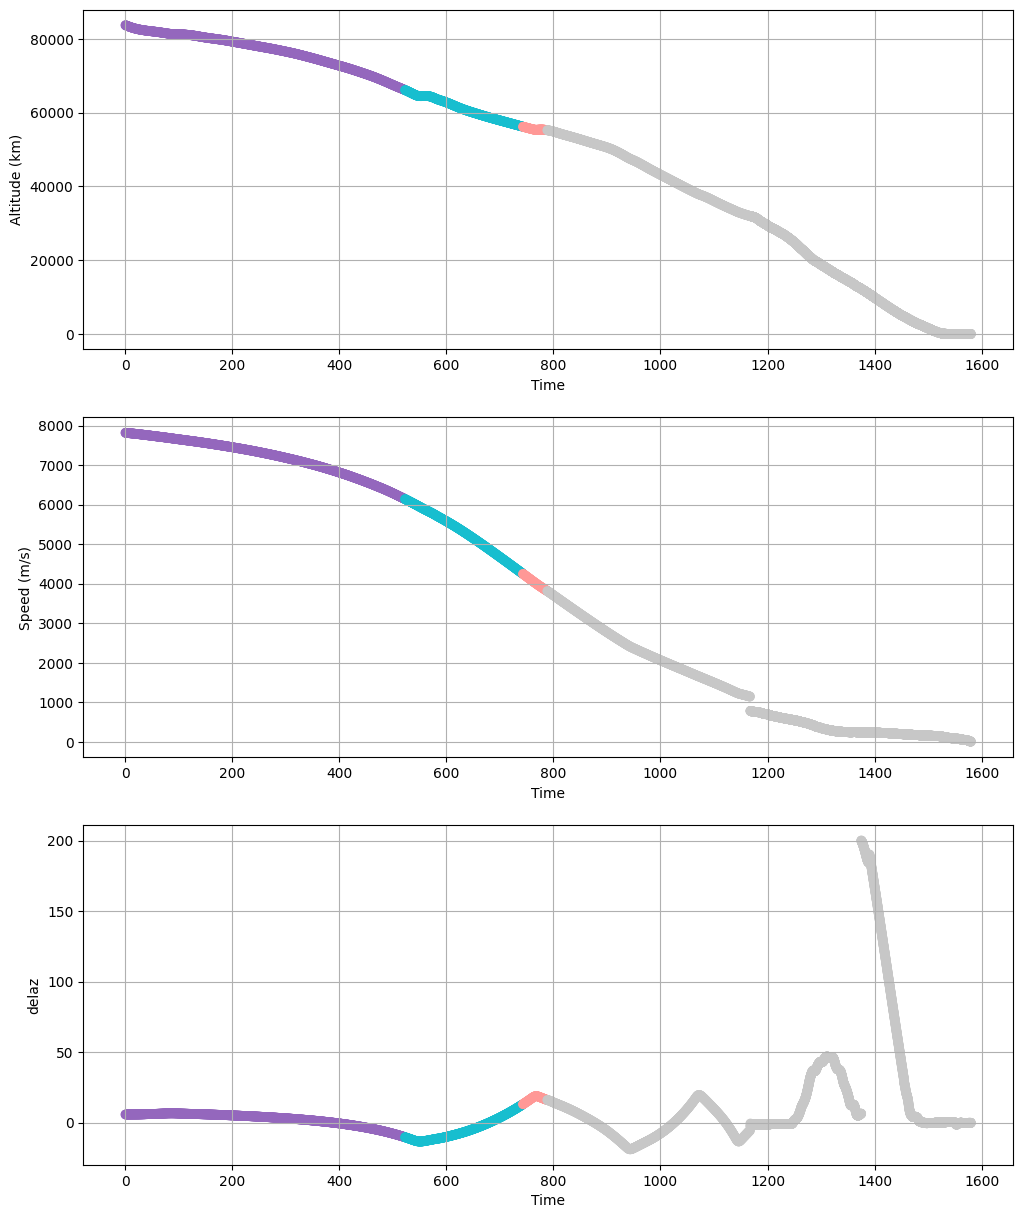

In [18]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 5 * 3))

plt_ = ax[0]
plt1 = plt_.scatter(data['time'], data['rwy_alt'], c=data['guid_id'], cmap=guid_id_cmap, vmin=11, vmax=15)
    

plt_.set_xlabel('Time')
plt_.set_ylabel('Altitude (km)')
plt_.grid()
  


plt_ = ax[1]
plt2 = plt_.scatter(data['time'], data['surfv'], c=data['guid_id'], cmap=guid_id_cmap, vmin=11, vmax=15)
    
plt_.set_xlabel('Time')
plt_.set_ylabel('Speed (m/s)')
plt_.grid()


plt_ = ax[2]
plt2 = plt_.scatter(data['time'], data['delaz'], c=data['guid_id'], cmap=guid_id_cmap, vmin=11, vmax=15)
    
plt_.set_xlabel('Time')
plt_.set_ylabel('delaz')
plt_.grid()


Text(0.5, 0, 'surfv')

Text(0, 0.5, 'Pitch °')

Text(0.5, 0, 'surfv')

Text(0, 0.5, 'Roll °')

(-200.0, 150.0)

Text(0.5, 0, 'surfv')

Text(0, 0.5, 'hdot')

(0.0, 52.0)

Text(0.5, 0, 'surfv')

Text(0, 0.5, 'drag (ft/s)')

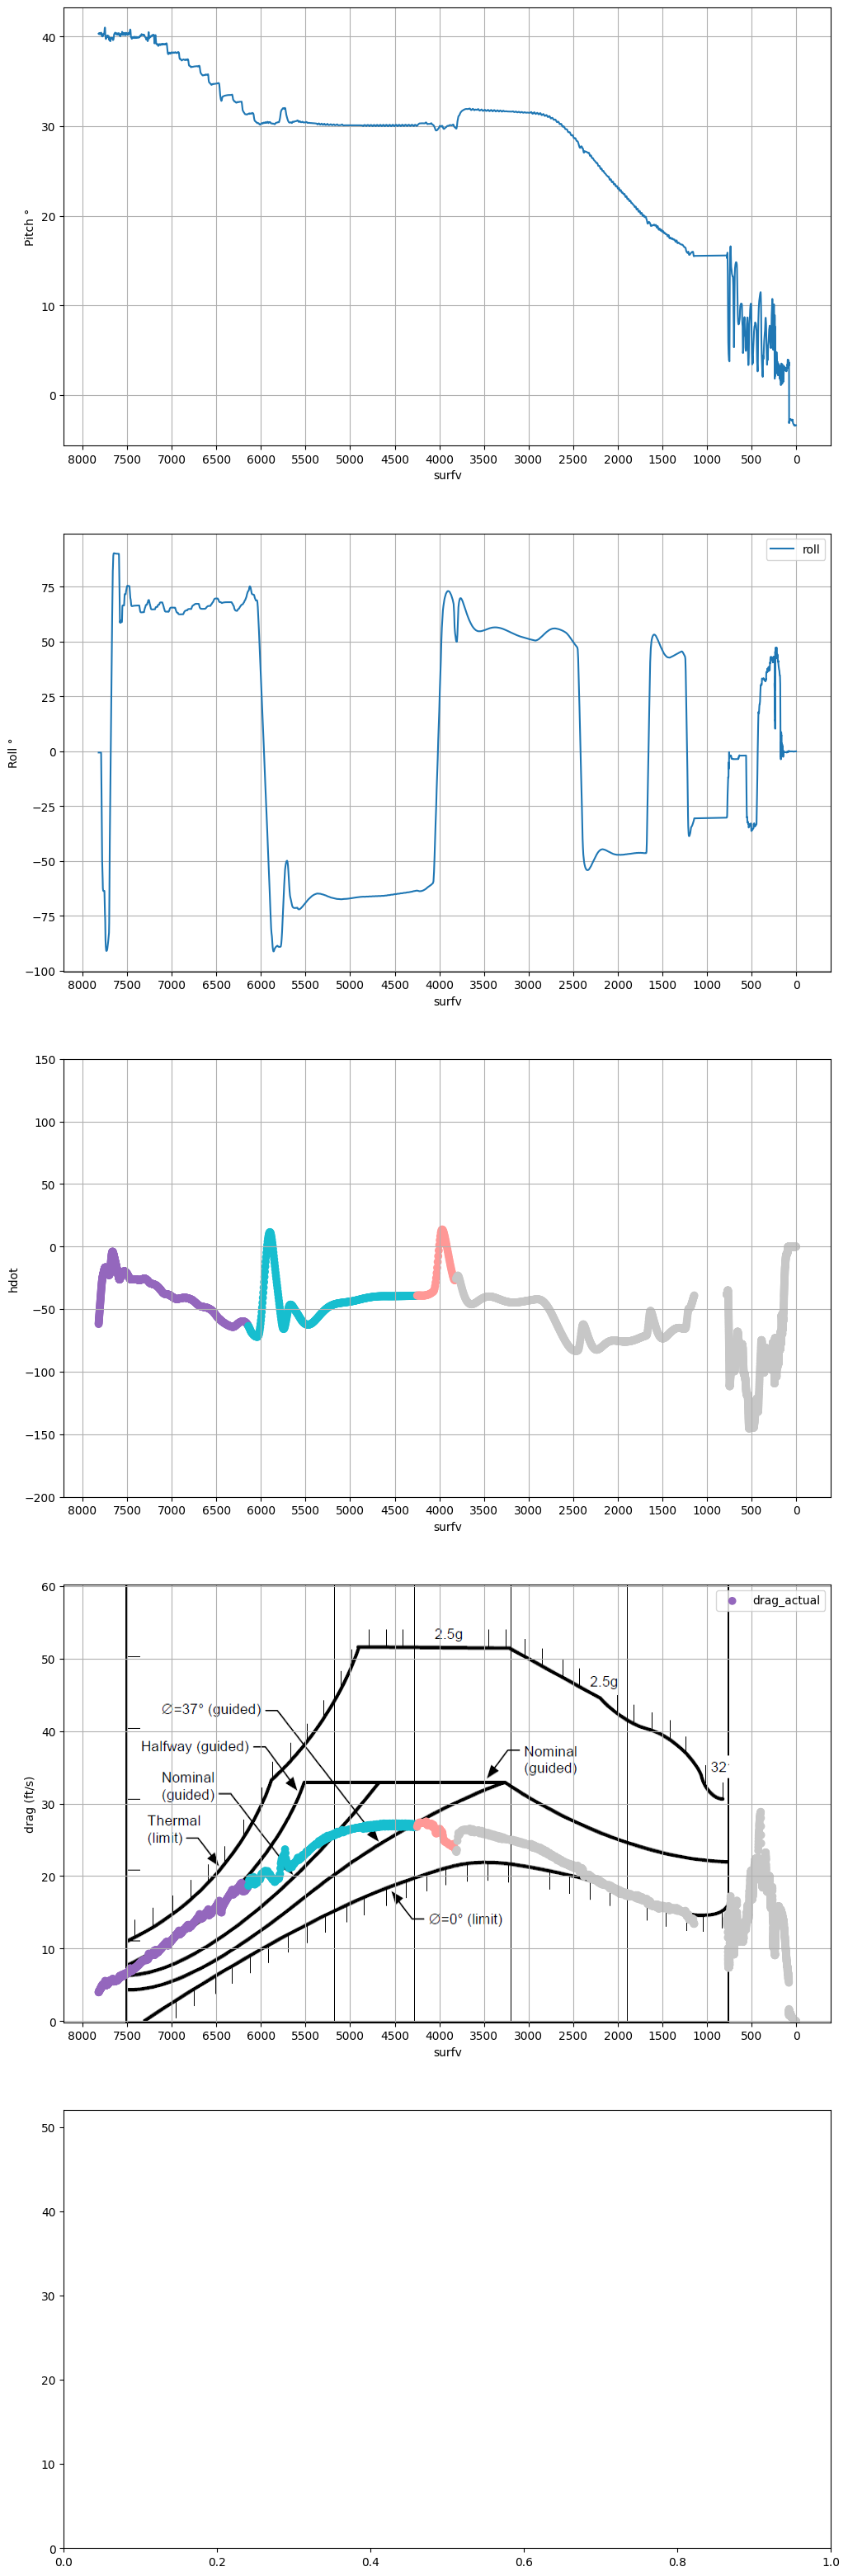

In [19]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(12, 8 * 5))

major_ticks = np.arange(0, 8500, 500)

plt_ = ax[0]
plt_.plot(data['surfv'], data['prog_pch'])
    
plt_.set_xlabel('surfv');
plt_.set_ylabel('Pitch °')

plt_.set_xticks(major_ticks);
plt_.grid();


plt_.invert_xaxis()

plt_ = ax[1]

plt1 = plt_.plot(data['surfv'], data['prog_roll'], label='roll');


    
plt_.set_xlabel('surfv')
plt_.set_ylabel('Roll °')
plt_.legend()

plt_.set_xticks(major_ticks);
plt_.grid();

plt_.invert_xaxis()


plt_ = ax[2]

plt1 = plt_.scatter(data['surfv'], data['hdot'], c=data['guid_id'], cmap=guid_id_cmap, vmin=11, vmax=15)
 
plt_.set_ylim([-200, 150])

plt_.set_xlabel('surfv')
plt_.set_ylabel('hdot')
plt_.set_xticks(major_ticks)
plt_.grid()

plt_.invert_xaxis()


plt_ = ax[3]

img = plt.imread("drag2.png")
plt_.imshow(img, aspect='auto', extent=[7520, 762, -0.2, 60.2], alpha=1 , cmap='Greys_r')

plt1 = plt_.scatter(data['surfv'], data['drag'], label='drag_actual', c=data['guid_id'], cmap=guid_id_cmap, vmin=11, vmax=15)
  
plt.ylim([0, 52])

plt_.set_xlabel('surfv')
plt_.set_ylabel('drag (ft/s)')
plt_.legend()
plt_.set_xticks(major_ticks)
plt_.grid()



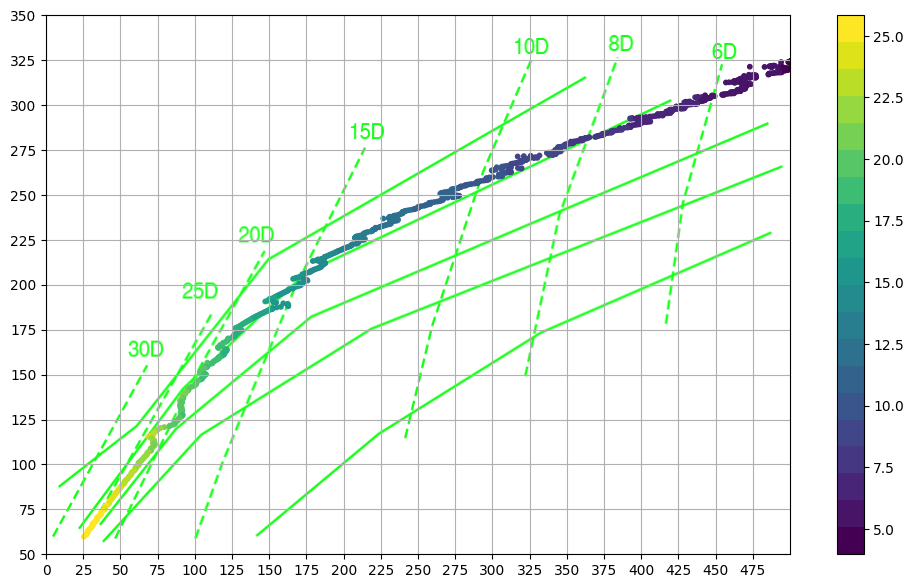

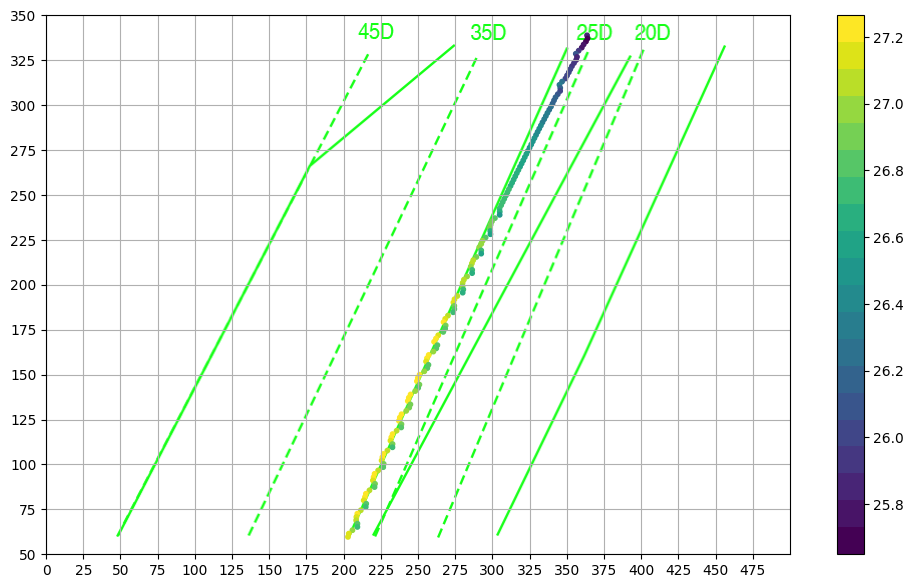

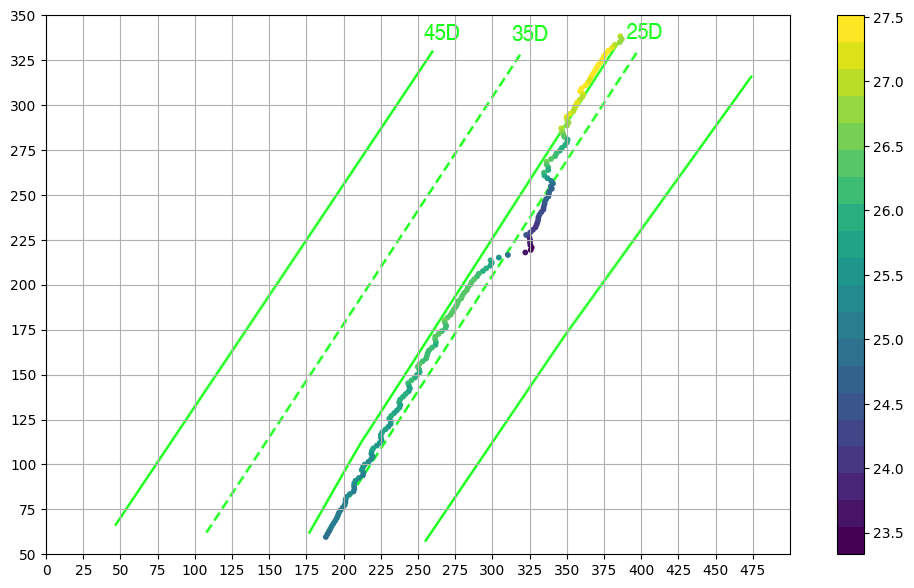

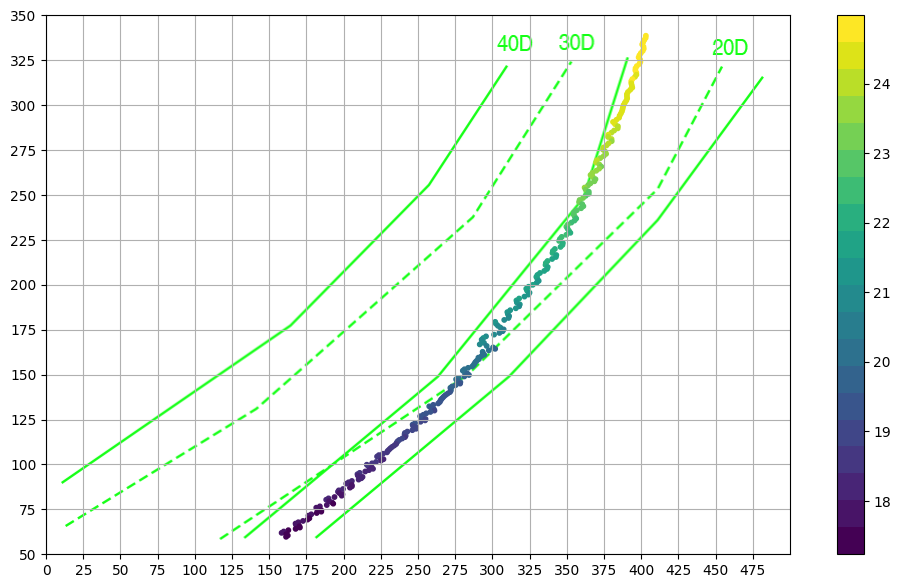

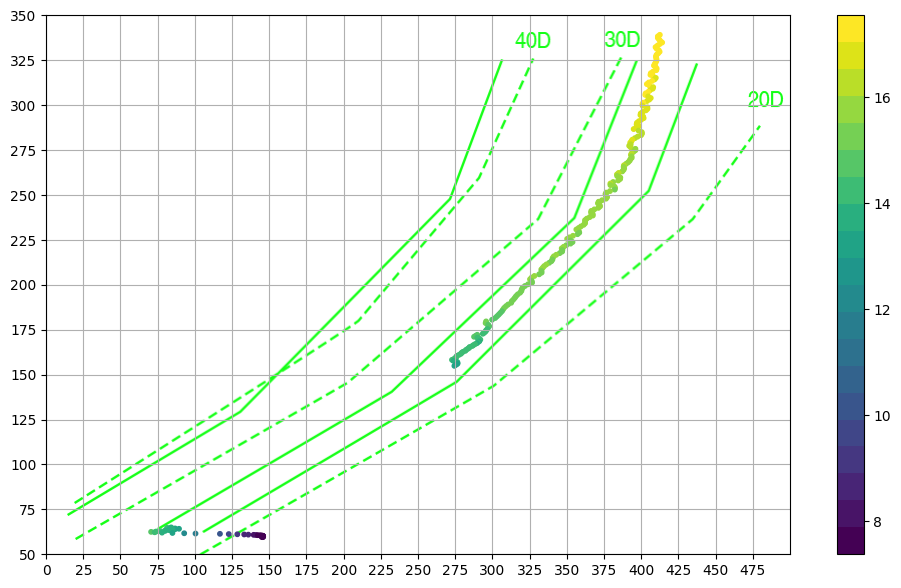

In [20]:
def traj_disp_new(n, data):
    if n==1:
        r_speed = (5181, 7925)
    elif n==2:
        r_speed = (4267, 5181)
    elif n==3:
        r_speed = (3200, 4267)
    elif n==4:
        r_speed = (1890, 3200)
    elif n==5:
        r_speed = (760, 1890)
        
    traj_data = data[(data['surfv'].between(*r_speed))][['range', 'surfv', 'drag', 'hdot']]

    traj_vel = traj_data['surfv'].to_numpy()
    traj_drag = traj_data['drag'].to_numpy()
    traj_color = traj_data['drag'].to_numpy()

    traj_x = np.array([traj_x_convert_new(n, v, d) for v, d in zip(traj_vel, traj_drag)])
    traj_y = np.array([traj_y_convert_new(n, v) for v in traj_vel])

    trajplot_lines_new(n, [traj_x, traj_y, traj_color])

def trajplot_lines_new(n, data):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

    plt_ = ax
    
    img = plt.imread("traj" + str(n) + "_bg.png")
    plt_.imshow(img, aspect='auto', extent=[0, 500, 50, 350])

    
    custom_cmap = plt.cm.get_cmap('viridis', 20)
        
    plt1 = plt_.scatter(
                       data[0],
                       data[1],
        c=data[2], cmap=custom_cmap, s=10)


    major_ticks = np.arange(0, 500, 25)
    
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    
    # And a corresponding grid
    ax.grid(which='both')
    
    plt_.set_xlim([0, 500])
    plt_.set_ylim([50, 350])
    
    cbar = plt.colorbar(plt1)
    
        
        
def traj_x_convert_new(n, vel, drag):
    
    if n==1:
        return 1269.3735913802313 + -0.08206361592134565 * vel**1 * drag**0 + -153.9799520644858 * vel**0 * drag**1 + -3.1466697000533627e-06 * vel**2 * drag**0 + 0.01314221307938963 * vel**1 * drag**1 + 4.662789044310247 * vel**0 * drag**2 + 7.728348100366489e-10 * vel**3 * drag**0 + -4.161746084256363e-07 * vel**2 * drag**1 + -0.00015695195109508781 * vel**1 * drag**2 + -0.052420876333425334 * vel**0 * drag**3
    elif n==2:
        return -119.27311679936585 + 0.1310360825751968 * vel**1 * drag**0 + -14.509634466688668 * vel**0 * drag**1 + -4.508956766569039e-07 * vel**2 * drag**0 + 0.0014529141150055665 * vel**1 * drag**1 + -0.004804810480900542 * vel**0 * drag**2
    elif n==3:
        return -169.89669862960386 + 0.19623953463938421 * vel**1 * drag**0 + -13.736386540438081 * vel**0 * drag**1 + -4.726735117477343e-07 * vel**2 * drag**0 + 0.00040459906559150603 * vel**1 * drag**1 + 0.07268485357148893 * vel**0 * drag**2
    elif n==4:
        return -734.5494910944298 + 0.9290782496000264 * vel**1 * drag**0 + -29.37866043040794 * vel**0 * drag**1 + -0.0001350962705991554 * vel**2 * drag**0 + 0.00109521485502761 * vel**1 * drag**1 + 0.31166666666704274 * vel**0 * drag**2
    elif n==5:
        return -365.6282303867932 + 1.0003973495016918 * vel**1 * drag**0 + -15.409853981961241 * vel**0 * drag**1 + -0.00024196873768544958 * vel**2 * drag**0 + -0.0016156332438259542 * vel**1 * drag**1 + 0.24249999999981453 * vel**0 * drag**2
        
            
def traj_y_convert_new(n, vel):

    if n==1:
        out = (0.00036443148 * vel - 1.88811953353)
    elif n==2:
        out = (0.0010940919 * vel - 4.66849015317)
    elif n==3:
        out = (0.00093720712 * vel - 2.99906279288)
    elif n==4:
        out = (0.00076335877 * vel - 1.4427480916)
    elif n==5:
        out = (0.00088495575 * vel - 0.67256637168)

    return  59.5 + 280.2 * out




traj_disp_new(1, data)
traj_disp_new(2, data)
traj_disp_new(3, data)
traj_disp_new(4, data)
traj_disp_new(5, data)